In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ts.utility import Utility
from ts.experimental import GeneralizedExtremeValueDistribution, GevEstimate, Pso

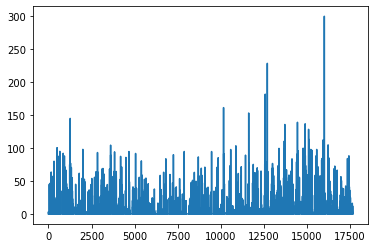

In [42]:
rainfall_series = pd.read_csv('../datasets/rainfall-data.csv')['..R/F'].to_numpy()

_ = plt.plot(rainfall_series)

# Monthly Maximum

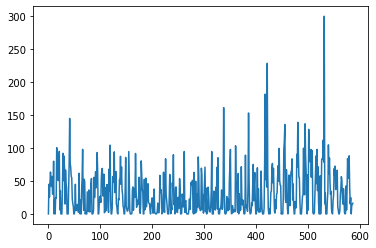

In [43]:
month_max_series = Utility.applyBlockAggregateFunc(
    rainfall_series, 30,
    lambda x: x.max(axis=0),
    considerPartial='no-front'
)

_ = plt.plot(week_max_series)

Shape: 0.934789975295414, Location: 8.910169761189907, Scale: 13.181118254875718, max log likelihood: -2725.985018807539


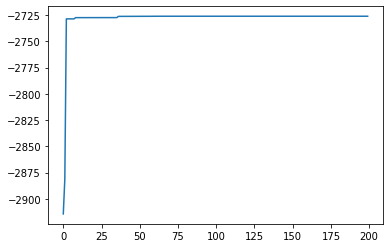

In [44]:
params, max_log_likelihood, max_log_likelihood_vals = GevEstimate.psoMethod(
    month_max_series,
    Pso.computeInitialPos([(-10, 10), (0, 100), (1, 10)], 200),
    numIterations=200
)

shape, location, scale = params
print(f'Shape: {shape}, Location: {location}, Scale: {scale}, max log likelihood: {max_log_likelihood}')


_ = plt.plot(max_log_likelihood_vals)

In [45]:
def get_return_level(shape, location, scale, prob):
    
    if shape == 0:
        return location - scale * np.log(-np.log(1 - prob))
        
    return location - (scale / shape) * (1 - ((-np.log(1 - prob)) ** (-shape)))

In [46]:
prob = 0.50
print('Return Level for p = %0.3f is %0.3f'
      %(prob, get_return_level(shape, location, scale, prob)))

Return Level for p = 0.500 is 14.672


In [52]:
prob = 0.05
print('Return Level for p = %0.3f is %0.3f'
      %(prob, get_return_level(shape, location, scale, prob)))

Return Level for p = 0.050 is 221.306


In [48]:
def get_most_likely_point(shape, location, scale, low, high, num_particles, num_iter):
    
    def min_func(x):
        
        log_lkhd = GeneralizedExtremeValueDistribution\
            .logLikelihood(shape, location, scale, np.array([x]))
        
        return -log_lkhd if log_lkhd is not None else np.inf
    
    init_pos = Pso.computeInitialPos([(low, high)], num_particles)
    
    return Pso.pso(min_func, init_pos, numIterations=num_iter)

[2.41799254]


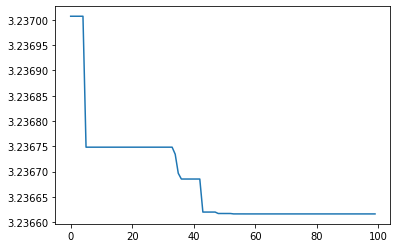

In [49]:
params, min_neg_log_lkhd, lkhd_vals = get_most_likely_point(shape, location, scale, 20, 300, 200, 100)

plt.plot(lkhd_vals)
print(params)